In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## จัดการข้อมูล Credit card

In [2]:
cc = pd.read_csv("C:/Users/WIN10/Downloads/For problem download/data_pack/cc.csv")

In [3]:
cc.head()

,cc_no,pos_dt,cc_txn_amt
0,37069,2018-05-10,5000
1,37069,2018-06-04,12000
2,37069,2018-04-03,5000
3,37069,2018-04-22,1600
4,37069,2018-01-21,5000


cc_no = บัตรเครดิต
pos_dt = วันของการใช้จ่าย
cc_txn_amt = จำนวณเงิน

In [4]:
cc.isnull().sum()

cc_no         0
pos_dt        0
cc_txn_amt    0
dtype: int64

In [5]:
cc["pos_dt"] = pd.to_datetime(cc["pos_dt"],errors='coerce')

In [6]:
cc.groupby(["cc_no",cc.pos_dt.dt.month]).sum()

cc_txn_amt
cc_no  pos_dt            
2      3             4600
       4            18700
       5             1600
       6             2000
4      5           300000
...                   ...
102408 2             2000
       3             4000
102409 4            14500
       5              900
       6            12400

[247089 rows x 1 columns]

{'whiskers': [<matplotlib.lines.Line2D at 0x18e6b902348>,
 'caps': [<matplotlib.lines.Line2D at 0x18e6b902cc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e6b8f9788>],
 'medians': [<matplotlib.lines.Line2D at 0x18e6b90bdc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e6b90dd88>],
 'means': []}

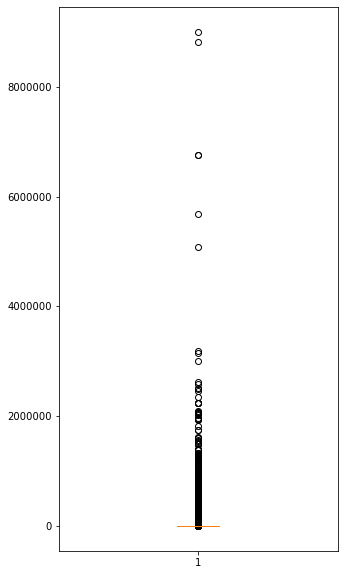

In [7]:
plt.figure(figsize=(5,10))
plt.boxplot(cc["cc_txn_amt"])

In [8]:
cc["cc_txn_amt"]

0          5000
1         12000
2          5000
3          1600
4          5000
          ...  
999108      800
999109      800
999110    10500
999111     1700
999112      500
Name: cc_txn_amt, Length: 999113, dtype: int64

### Remove Outlier

In [9]:
# x = cc["cc_txn_amt"][cc["cc_txn_amt"].between(cc["cc_txn_amt"].quantile(.15), cc["cc_txn_amt"].quantile(.85))] # without outliers

In [10]:
outlier = list(cc["cc_txn_amt"][cc["cc_txn_amt"] > cc["cc_txn_amt"].quantile(.85)].index)

In [11]:
outlier2 = list(cc["cc_txn_amt"][cc["cc_txn_amt"] < cc["cc_txn_amt"].quantile(.15)].index)

In [12]:
for i in outlier2:
    outlier.append(i)

In [13]:
cc = cc.drop(outlier)

  ***

## จัดการไฟล์ Users

In [14]:
persons = pd.read_csv("C:/Users/WIN10/Downloads/For problem download/data_pack/demographics.csv")

In [15]:
persons

,id,cc_no,gender,ocp_cd,age
0,1,1,2,9.0,5
1,1,98397,2,9.0,5
2,2,2,2,3.0,4
3,2,9740,2,3.0,4
4,3,3,2,1.0,3
...,...,...,...,...,...
102404,64996,102393,2,3.0,2
102405,64997,102395,2,3.0,2
102406,64998,102401,1,9.0,3
102407,64999,102407,2,3.0,3


id = id ลูกค้า
cc_no = หมายเลขบัตรเครดิต
gender = เพศ
ocp_cd = รหัสอาชีพ
age = ช่วงอายุ

In [16]:
persons.isnull().sum() #check the null values in dataframe

id         0
cc_no      0
gender     0
ocp_cd    26
age        0
dtype: int64

In [17]:
persons[persons.isnull().any(axis = 1)]  #show field that has null values

,id,cc_no,gender,ocp_cd,age
10543,5344,5510,1,NaN,3
10544,5344,19230,1,NaN,3
10545,5344,47370,1,NaN,3
10546,5344,58117,1,NaN,3
10547,5344,61765,1,NaN,3
11233,5694,5876,1,NaN,2
43778,23233,26421,2,NaN,3
43779,23233,92381,2,NaN,3
49415,26505,30740,1,NaN,3
49416,26505,95746,1,NaN,3


In [18]:
persons["ocp_cd"] = persons["ocp_cd"].fillna(persons["ocp_cd"].median) #replace null value as NA

## Join Users and CC

In [19]:
# persons.join(cc, lsuffix='_users', rsuffix='_credit')

In [20]:
cc_sum = cc.groupby("cc_no").sum()

In [21]:
cc_sum = cc_sum.reset_index()

In [24]:
cc_sum

,cc_no,cc_txn_amt
0,2,8200
1,5,2000
2,7,9500
3,9,4000
4,11,12700
...,...,...
54403,102403,28000
54404,102406,4900
54405,102407,23500
54406,102408,6000


In [22]:
# .join(kplus.set_index('id'), on='id').drop(["pos_dt","sunday"],axis=1)

In [42]:
join1 = pd.merge(persons,cc_sum ,on="cc_no", how="left")

In [43]:
join1

,id,cc_no,gender,ocp_cd,age,cc_txn_amt
0,1,1,2,9,5,NaN
1,1,98397,2,9,5,NaN
2,2,2,2,3,4,8200.0
3,2,9740,2,3,4,38300.0
4,3,3,2,1,3,NaN
...,...,...,...,...,...,...
102404,64996,102393,2,3,2,NaN
102405,64997,102395,2,3,2,2100.0
102406,64998,102401,1,9,3,NaN
102407,64999,102407,2,3,3,23500.0


In [46]:
persons_cc = join1.fillna(0).drop("cc_no",axis=1).groupby(["id","gender","age"]).sum()

In [53]:
persons_cc

,,,cc_txn_amt
id,gender,age,
1,2,5,0.0
2,2,4,46500.0
3,2,3,0.0
4,2,5,0.0
5,2,4,2000.0
...,...,...,...
64996,2,2,0.0
64997,2,2,2100.0
64998,1,3,0.0


## Clean Kplus data

In [47]:
kplus = pd.read_csv("C:/Users/WIN10/Downloads/For problem download/data_pack/kplus.csv")

In [48]:
kplus.isnull().sum()

id              0
sunday          0
kp_txn_count    0
kp_txn_amt      0
dtype: int64

In [49]:
kplus.head()

,id,sunday,kp_txn_count,kp_txn_amt
0,14802,2018-01-14,2,2400
1,14802,2018-04-01,9,33900
2,14802,2018-05-27,7,6100
3,14802,2018-01-28,3,8500
4,14802,2018-03-25,2,4000


,  id = users
,  sunday = สรุปยอดรายอาทิตย์
,  kp_txn_count = จำนวณครั้งที่ใช้แอพในอาทิตยืนั้น
,  kp_txn_amt = จำนวณเงิน

In [50]:
kplus["sunday"] = pd.to_datetime(kplus["sunday"],errors='coerce')

In [52]:
kplus.groupby("id").sum()

,kp_txn_count,kp_txn_amt
id,,
1,2,3500
2,104,210000
3,70,139700
4,315,6076100
6,10,13400
...,...,...
64995,88,960500
64996,20,41200
64997,76,201200


## Join persons_cc and kplus

In [1]:
# persons_cc_kplus = 
persons_cc.join(kplus.set_index('id'), on='id').drop(["pos_dt","sunday"],axis=1)

NameError: name 'persons_cc' is not defined

In [38]:
persons_cc_kplus.set_index("id")

,gender,ocp_cd,age,cc_txn_amt,kp_txn_count,kp_txn_amt
id,,,,,,
1,2,9,5,4700.0,1.0,2000.0
1,2,9,5,4700.0,1.0,1500.0
1,2,9,5,10000.0,1.0,2000.0
1,2,9,5,10000.0,1.0,1500.0
1,2,9,5,10000.0,1.0,2000.0
...,...,...,...,...,...,...
64999,2,3,3,2100.0,6.0,28400.0
64999,2,3,3,2100.0,5.0,6400.0
65000,2,9,4,2000.0,NaN,NaN


In [17]:
persons_cc_kplus.groupby(["id","gender","age"]).sum()

,,,cc_txn_amt,kp_txn_count,kp_txn_amt
id,gender,age,,,
1,2,5,89400.0,10.0,17500.0
2,2,4,1630000.0,4368.0,8820000.0
4,2,5,19250000.0,11340.0,218739600.0
5,2,4,12000.0,0.0,0.0
6,1,3,96000.0,30.0,40200.0
...,...,...,...,...,...
64993,1,4,5000.0,0.0,0.0
64995,2,4,2939400.0,4400.0,48025000.0
64997,2,2,39900.0,76.0,201200.0


In [14]:
# data = persons_cc_kplus.drop_duplicates(persons_cc_kplus)

## Linear Regression